In [7]:
import numpy as np
import matplotlib.pyplot as plt

from models.rc_2r2c import RC2R2C, RC2R2CParams


In [8]:
# parámetros del edificio
p = RC2R2CParams(
    C_air=1.2e6,   # J/K
    C_mass=9e6,    # J/K
    R_am=0.004,    # K/W
    R_ao=0.006,    # K/W
    dt=300.0       # 5 min
)
m = RC2R2C(p)

# entradas (puedes jugar cambiando estos valores)
T_out = 283.15  # 10 °C exterior
u = 0.0      # calefacción constante [W]
x0 = np.array([293.15, 293.15])  # 20 °C interior y masa

# simular 12 horas (12*60/5 = 144 pasos de 5 min)
traj = m.simulate(x0, u, T_out, steps=2016)

traj[:5]  # ver primeras filas numéricas


array([[293.15      , 293.15      ],
       [292.73333333, 293.15      ],
       [292.36006944, 293.14652778],
       [292.0254702 , 293.13997396],
       [291.72531542, 293.13068643]])

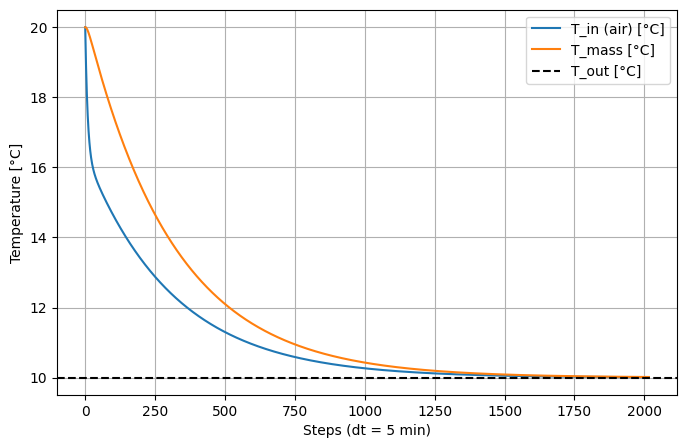

In [9]:
plt.figure(figsize=(8,5))
plt.plot(traj[:,0]-273.15, label="T_in (air) [°C]")
plt.plot(traj[:,1]-273.15, label="T_mass [°C]")
plt.axhline(T_out-273.15, color="k", linestyle="--", label="T_out [°C]")
plt.xlabel("Steps (dt = 5 min)")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid(True)
plt.show()
